In [1]:
from importlib import reload

import numpy as np
import json
import matplotlib.pyplot as plt
from time import time
from mandelbrot_matrix import SEED, random_mandelbrot_points

save_files = False
# reload(mandelbrot_matrix)

plt.style.use('seaborn')

re_lim=(-2,1) 
im_lim=(-1.25,1.25)

theta = 1.506793

## Threshold number
We first determine the threshold size for the mandelbrot set
We do this y fixing the sample size to 1000 and the number of points per sample to 100000

In [2]:
from time import time
from tqdm.auto import trange, tqdm
from sampling_functions import generate_pureRandomSample

def run_simulation(sample_size, n_points, threshold=100, re_lim=(-2,1), im_lim=(-1.25,1.25), function=generate_pureRandomSample): 
    sample_data = []
    sample_time = []
    plot_area = (re_lim[1] - re_lim[0]) * (im_lim[1]-im_lim[0])
    for sample in range(sample_size):
        start_time = time()
        # run iteration
        re, im, n = random_mandelbrot_points(n_points, re_lim=re_lim, im_lim=im_lim, threshold=threshold, function=function)
        
        # calculate sample data
        points_inside = np.size(np.where(n>=threshold))
        mdb_area = points_inside / n_points * plot_area
        
        sample_data.append(mdb_area)
        
        calc_time = time() - start_time
        sample_time.append(calc_time)
    
    mean_area = np.mean(sample_data)
    std_area = np.std(sample_data)
    calc_time = np.mean(sample_time)
    
    return mean_area, std_area, calc_time, sample_data
    
    

In [6]:
# Run this simulation tonight! Change threshold list!

sample_size = 1000
n_points = 10000

threshold_list = np.arange(0, 1000, 100)
threshold_list[0] = 50

average_list = []
std_list = []
time_list = []
data = []
area = (re_lim[1] - re_lim[0]) * (im_lim[1]-im_lim[0])

np.random.seed(SEED) # type: ignore

for threshold in tqdm(threshold_list):
    
    average, std, sim_time, _ = run_simulation(sample_size, n_points, threshold, re_lim=re_lim, im_lim=im_lim)
    
    average_list.append(average)
    std_list.append(std)
    time_list.append(sim_time)


100%|██████████| 10/10 [13:18<00:00, 79.81s/it] 


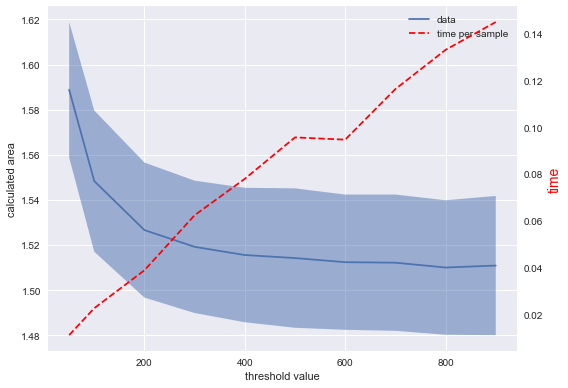

In [18]:
fig, ax = plt.subplots()
ax.plot(threshold_list, average_list, label="data")

# ax.plot(threshold_list, std_list)
ax.fill_between(threshold_list, 
                average_list+std_list, 
                average_list-np.array(std_list), 
                alpha=0.5,
                label="$\sigma$")

ax.legend()
ax.set(
    xlabel="threshold value",
    ylabel="calculated area",
    )
plt.tight_layout()

# include time plot on 2nd y axis

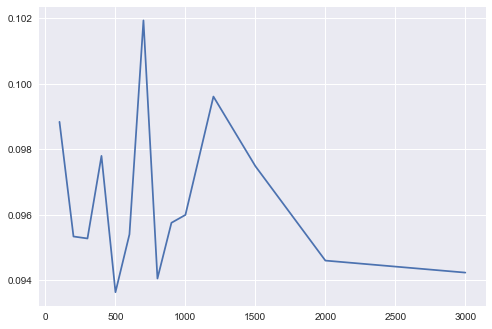

In [48]:
plt.plot(threshold_list, np.sqrt(std_list))

In [41]:
# write data to csv file
save_files = True


In [21]:
import csv

def save_to_csv(filedir: str, headers, datalists):  
    with open("simulation_data/" + filedir, 'w', newline="") as fp:
        writer = csv.writer(fp)
        writer.writerow(headers)
        
        for i in range(len(datalists[0])):
            row = []
            for i_list in range(len(datalists)):
                row.append(datalists[i_list][i])
            writer.writerow(row)
        print("saved to file!")

## Determining sample size 

In [23]:
# determine Sample size
sample_size = 1000
n_points_list = [100, 300, 500, 750, 1000, 1500, 2000, 3000, 4000, 6000, 8000, 10000]

threshold = 1500
average_list = []
std_list = []
time_list = []
data = []
area = (re_lim[1] - re_lim[0]) * (im_lim[1]-im_lim[0])

np.random.seed(SEED) # type: ignore

# n_points_list2 = [12500, 15000]
for n_points in tqdm(n_points_list):
# for n_points in tqdm(n_points_list2):
    
    average, std, sim_time , _= run_simulation(sample_size, n_points, threshold, re_lim=re_lim, im_lim=im_lim)
    average_list.append(average)
    std_list.append(std)
    time_list.append(sim_time)


100%|██████████| 12/12 [19:36<00:00, 98.00s/it] 


In [23]:
if save_files:
    save_to_csv(f"random_points_computation_ss={sample_size}_th={threshold}1",
                ["n_points", "mean", "std", "computation_time"],
                [
                    n_points_list,
                    average_list,
                    std_list,
                    time_list
                ])
    save_files = False

saved to file!


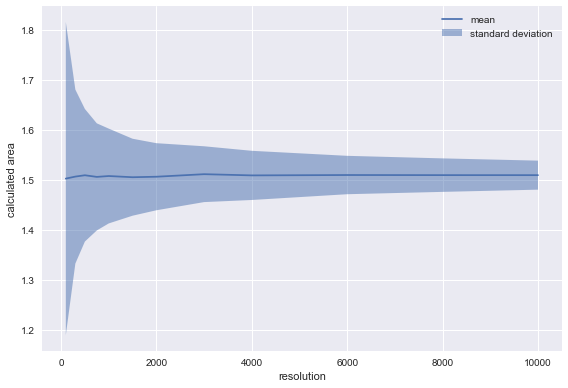

In [26]:
  
import pandas as pd 

df = pd.read_csv("./simulation_data/random_points_computation_ss=1000_th=1500")

n_points_list = df["n_points"]
average_list = df["mean"]
std_list = df["std"]
time_list = df["computation_time"]


fig, ax = plt.subplots()

ax.plot(n_points_list, average_list, label="mean")
ax.fill_between(n_points_list, 
                average_list+std_list, 
                average_list-np.array(std_list), label="standard deviation",
                alpha=0.5)
ax.legend()
ax.set(
    xlabel="resolution",
    ylabel="calculated area",
    )
plt.tight_layout()

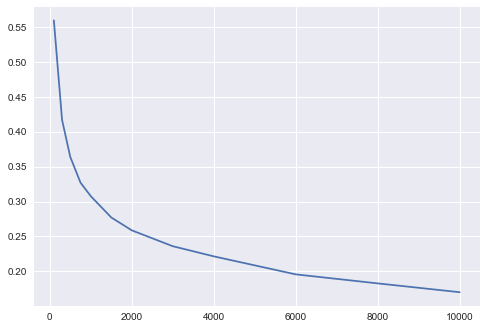

In [27]:
plt.plot(n_points_list, np.sqrt(std_list))

In [9]:
i_list = np.arange(100,1000,100)
s_list = np.arange(100,1000,100)

threshold = 1500
n_points = 15000

data = []
np.random.seed(SEED) # type: ignore

In [3]:
def get_confidence_interval(lmda, sample_std, sample_size):
    a = lmda * sample_std / np.sqrt(sample_size)
    return a

# calculating the confidence interfal for random sampling

calculate A_est and its interval, check if that interval is withing the theta interval

In [11]:
from sampling_functions import generate_pureRandomSample, generate_latinHyperCube, generate_Orthogonal, generate_Orthogonal_inPlace
samplestep = 100
max_a = 0.01
a = 1
threshold = 100
n_points = 100
data = []
mean = 0
it_count = 0
std = 0 
np.random.seed(SEED) # type: ignore


while a > max_a:
    mean, std, sim_time, run_data = run_simulation(sample_size=samplestep,n_points=n_points,threshold=threshold)
    it_count += samplestep
    
    data.append(run_data)
    std = np.std(data)
    mean = np.mean(data)
    a = get_confidence_interval(1.96, std, it_count)
    
    # print(f"for {it_count} samples, we have a std of {std:.3g}")
    # print(f"This means for a 95% confidence interval, we have a={a:.3g} and X={mean:.5f}\n \
    #       [\theta - a, \theta + a] = [{theta - a:.3g}, {theta+a:.3g}]\
    #       ")
print(f"Interval reached after {it_count}. mean={mean:.4f}, std={std:.4g}")
print(f"This means for a 95% confidence interval, we have a={a:.3g} and X={mean:.5f}\n \
        [\theta - a, \theta + a] = [{theta - a:.4f}, {theta+a:.4f}]\
        ")

a =1
data = []
it_count = 0
print(f"Latin Hyper Cube")
while a > max_a:
    mean, std, sim_time, run_data = run_simulation(sample_size=samplestep,n_points=n_points,threshold=threshold, function=generate_latinHyperCube)
    it_count += samplestep
    
    data.append(run_data)
    std = np.std(data)
    mean = np.mean(data)
    a = get_confidence_interval(1.96, std, it_count)
    # print(f"for {it_count} samples, we have a std of {std:.3g}")
    # print(f"This means for a 95% confidence interval, we have a={a:.3g} and X={mean:.5f}\n \
    #       [\theta - a, \theta + a] = [{theta - a:.3g}, {theta+a:.3g}]\
        #   ")
print(f"Interval reached after {it_count}. mean={mean:.4f}, std={std:.4g}")
print(f"This means for a 95% confidence interval, we have a={a:.3g} and X={mean:.5f}\n \
        [\theta - a, \theta + a] = [{theta - a:.4f}, {theta+a:.4f}]\
        ")


Interval reached after 3500. mean=1.5511, std=0.3005
This means for a 95% confidence interval, we have a=0.00996 and X=1.55113
         [	heta - a, 	heta + a] = [1.4968, 1.5167]        
Latin Hyper Cube
Interval reached after 1600. mean=1.5457, std=0.2032
This means for a 95% confidence interval, we have a=0.00996 and X=1.54575
         [	heta - a, 	heta + a] = [1.4968, 1.5167]        


In [4]:

%%time

n_sim = 100    # number of simulations to run``
n_size = 1000   # amount of ramdom points
threshold = 1000 # threshold for mandelbrot
data = []



for sim in range(n_sim):
    re, im, n = random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
    count_inside = np.size(np.where(n>=threshold))
    
    # monte carlo
    total_points = n_size
    avg = count_inside/total_points
    
    
    
    data.append(avg)
    # print(avg)
    # average will follow a normal distribution for large values of n i.e. sim
    # alpha = 0.5
    # alpha/2 = 0.25. Z(alpha/2) = 1.96
    # percent confidence interval  = 100*(1-alpha) = 100*(1-0.5) = 95%
    # stop when 2*z*s/(sqrt(sim)) < l. 
    # if we just allow 1% error then 1% of 1.506484 = 0.01506484 ~ 0.015. Therefore our l is 0.015/Area of rectangle
    # l = (0.015)/6 = 0.0025
    # sample mean of (j+1)
    
    # Our samples - averages

prev_estimated_mean = np.sum(data)/(n_sim)
# print(prev_estimated_mean)

mean_difference = 0

for i in range(n_sim):
    mean_difference += (data[i]-prev_estimated_mean)**2
    
prev_estimated_std = mean_difference/(n_sim-1)



l = 0.0025
z = 1.96
estimated_std_deviation = np.sqrt(prev_estimated_std)
acceptable_window = 2*z*estimated_std_deviation/np.sqrt(n_sim)
# print(acceptable_window)

while(acceptable_window > l):
    
        re, im, n = random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
        count_inside = np.size(np.where(n>=threshold))
    
        # monte carlo
        total_points = n_size
        avg = count_inside/total_points
        #data.append(avg)
        
        
        
        new_estimated_mean = prev_estimated_mean + (avg - prev_estimated_mean)/(n_sim+1)
        new_estimated_std = (1-1/(n_sim))*prev_estimated_std + (n_sim+1)*(new_estimated_mean-prev_estimated_mean)**2
        
        
        n_sim +=1
        # print(n_sim)
        prev_estimated_std = new_estimated_std
        prev_estimated_mean = new_estimated_mean
        
        estimated_std_deviation = np.sqrt(new_estimated_std)
        acceptable_window = 2*z*estimated_std_deviation/np.sqrt(n_sim)
        # print(acceptable_window)



CPU times: user 12.6 s, sys: 139 ms, total: 12.8 s
Wall time: 13.8 s


In [33]:
%%time

n_sim = 428    # number of simulations to run``
n_size = 1000   # amount of ramdom points
threshold = 1000 # threshold for mandelbrot
data = []

for sim in range(n_sim):
    re, im, n = random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
    count_inside = np.size(np.where(n>=threshold))
    
    # monte carlo
    total_points = n_size
    avg = count_inside/total_points
    
    
    
    data.append(avg)
    # print(avg)
    # average will follow a normal distribution for large values of n i.e. sim
    # alpha = 0.5
    # alpha/2 = 0.25. Z(alpha/2) = 1.96
    # percent confidence interval  = 100*(1-alpha) = 100*(1-0.5) = 95%
    # stop when 2*z*s/(sqrt(sim)) < l. 
    # if we just allow 1% error then 1% of 1.506484 = 0.01506484 ~ 0.015. Therefore our l is 0.015 here
    # sample mean of (j+1)
    
    # Our samples - our averages
    

prev_estimated_mean = np.sum(data)/(n_sim)
print(prev_estimated_mean)

mean_difference = 0

for i in range(n_sim):
    mean_difference += (data[i]-prev_estimated_mean)**2
    
prev_estimated_std = mean_difference/(n_sim-1)


#l = 0.0025
l = 0.0025
z = 1.96
estimated_std_deviation = np.sqrt(prev_estimated_std)
acceptable_window = 2*z*estimated_std_deviation/np.sqrt(n_sim)
print(acceptable_window)


while(acceptable_window > l):
    
        re, im, n = random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
        count_inside = np.size(np.where(n>=threshold))
    
        # monte carlo
        total_points = n_size
        avg = count_inside/total_points
        #data.append(avg)
        
        
        
        new_estimated_mean = prev_estimated_mean + (avg - prev_estimated_mean)/(n_sim+1)
        new_estimated_std = (1-1/(n_sim))*prev_estimated_std + (n_sim+1)*(new_estimated_mean-prev_estimated_mean)**2
        
        
        n_sim +=1
        print(n_sim)
        prev_estimated_std = new_estimated_std
        prev_estimated_mean = new_estimated_mean
        
        estimated_std_deviation = np.sqrt(new_estimated_std)
        acceptable_window = 2*z*estimated_std_deviation/np.sqrt(n_sim)
        print(acceptable_window)



0.254
0.23
0.242
0.234
0.257
0.249
0.246
0.259
0.231
0.236
0.276
0.234
0.264
0.248
0.262
0.253
0.266
0.261
0.233
0.257
0.26
0.257
0.254
0.245
0.242
0.255
0.239
0.24
0.266
0.265
0.272
0.256
0.256
0.244
0.273
0.254
0.242
0.241
0.265
0.251
0.25
0.24
0.228
0.239
0.262
0.243
0.257
0.259
0.256
0.256
0.247
0.255
0.245
0.264
0.255
0.259
0.256
0.257
0.261
0.247
0.246
0.256
0.245
0.254
0.246
0.271
0.243
0.255
0.239
0.252
0.245
0.252
0.268
0.259
0.257
0.242
0.239
0.248
0.242
0.262
0.237
0.256
0.256
0.238
0.271
0.249
0.258
0.256
0.249
0.259
0.251
0.249
0.233
0.231
0.257
0.24
0.246
0.269
0.267
0.259
0.255
0.247
0.267
0.264
0.253
0.275
0.255
0.244
0.262
0.278
0.232
0.27
0.226
0.249
0.26
0.254
0.248
0.252
0.24
0.254
0.233
0.237
0.247
0.259
0.26
0.263
0.257
0.259
0.223
0.263
0.241
0.255
0.256
0.261
0.248
0.245
0.224
0.251
0.252
0.257
0.256
0.246
0.278
0.261
0.258
0.222
0.274
0.257
0.258
0.254
0.254
0.242
0.267
0.256
0.24
0.244
0.249
0.249
0.274
0.247
0.259
0.248
0.25
0.241
0.244
0.252
0.265
0.275
0.24

In [36]:
A_theoritical = 1.506484

mean = prev_estimated_mean
rectangle_area = 6
A_estimated = mean*rectangle_area
error = abs(A_theoritical - A_estimated)/(A_theoritical)*100
print(error)

print(1.506484 + 0.015)
print(1.506484 - 0.015)

0.022822219426958487
1.5214839999999998
1.491484


In [34]:
mean = prev_estimated_mean
area = mean*6
print(area)

1.506140186915888


In [25]:
rectangle_area = 6
mean = 1.506484/rectangle_area
#area_mandelbrot = (count_inside/total_points)*rectangle_area

print(0.2506*rectangle_area)
print(0.015/rectangle_area)
#print(mean)

1.5036
0.0025


In [ ]:
print(n_sim)

In [62]:
%%time

n_sim = 428    # number of simulations to run``
n_size = 1000   # amount of ramdom points
thresholdRange = np.unique(np.logspace(start=1,stop=3.5,num=100,base=10).astype(int)) # threshold for mandelbrot

# How the error varies with i(number of iterations)

error = []
for threshold in thresholdRange:
    data = []
    for sim in range(n_sim):
        re, im, n = random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
        count_inside = np.size(np.where(n>=threshold))
    
        # monte carlo
        total_points = n_size
        avg = count_inside/total_points
        data.append(avg)
        #print(avg)
    
    prev_estimated_mean = np.sum(data)/(n_sim)
    print(prev_estimated_mean)

    A_theoritical = 1.506484

    mean = prev_estimated_mean
    rectangle_area = 6
    A_estimated = mean*rectangle_area
    errorPer = abs(A_theoritical - A_estimated)/(A_theoritical)*100
    error.append(errorPer)

0.3460070093457944
0.3357570093457944
0.32649532710280377
0.3194883177570093
0.31255841121495326
0.30818691588785047
0.3032757009345794
0.298588785046729
0.2967920560747664
0.2894252336448598
0.28787616822429907
0.2865093457943925
0.2843878504672897
0.2826051401869159
0.2801028037383178
0.2781214953271028
0.27498598130841123
0.2755630841121495
0.27369158878504674
0.27254906542056073
0.2687336448598131
0.2697803738317757
0.26815654205607475
0.2653294392523365
0.26580373831775705
0.264481308411215
0.26402570093457944
0.2631728971962617
0.26272429906542055
0.26143691588785045
0.26138084112149534
0.2605700934579439
0.2607196261682243
0.2581355140186916
0.25996962616822433
0.2606728971962617
0.25887616822429904
0.25794158878504675
0.25900700934579435
0.25656542056074766
0.25519392523364487
0.256623831775701
0.25367056074766353
0.25649766355140186
0.25392757009345795
0.2549719626168224
0.2547266355140187
0.2536869158878505
0.2539906542056075
0.2542266355140187
0.2542056074766355
0.2544649532

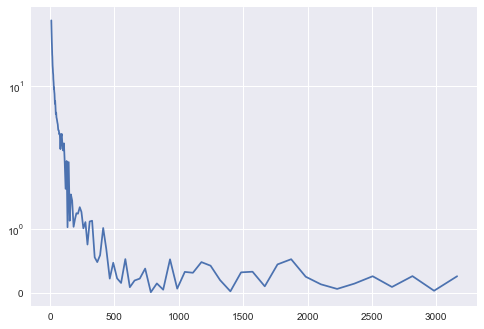

In [64]:
plt.yscale('symlog')
plt.plot(thresholdRange,error)
plt.show()

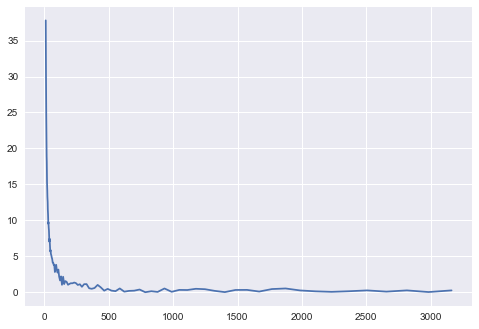

In [63]:

plt.plot(thresholdRange,error)
plt.show()

In [65]:
print(error)

[37.80710953948176, 33.72475619221753, 30.036028435537503, 27.245288137282298, 24.485256218434415, 22.74418416173705, 20.78815344918873, 18.921456204007068, 18.20585790812239, 15.271811839299913, 14.65485258029919, 14.110476763533839, 13.26553105135789, 12.555516097183613, 11.558889601874764, 10.76977730680292, 9.520969877573705, 9.750817444652405, 9.00544132631216, 8.550398976913435, 7.03079947472915, 7.447688989106722, 6.800951907650436, 5.674977996050346, 5.863881057252676, 5.337185822570299, 5.155727216981842, 4.816073929598337, 4.637406994865081, 4.124670114458751, 4.102336747617117, 3.77943348536483, 3.838989130275921, 2.8097931416563173, 3.5402803487688006, 3.820377991241201, 3.1047796953564935, 2.732556914662265, 3.1568908846536807, 2.184458870089952, 1.6382219394211552, 2.2077227938833595, 1.0314988068895101, 2.1574727184896294, 1.1338600715804275, 1.549819029006256, 1.4521105490740114, 1.0380127055516548, 1.1589851092773071, 1.2529713614025928, 1.244596348836976, 1.3478881704

In [77]:
%%time

n_sim = 428    # number of simulations to run``
n_sizeRange = np.arange(500,1300,50)  # amount of ramdom points
threshold = 500 # threshold for mandelbrot

# increase sample size by 50 

# i constant and increase sample size

errorSample = []
for n_size in n_sizeRange:
    data = []
    for sim in range(n_sim):
        re, im, n = random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
        count_inside = np.size(np.where(n>=threshold))
    
        # monte carlo
        total_points = n_size
        avg = count_inside/total_points
        data.append(avg)
        #print(avg)
    
    prev_estimated_mean = np.sum(data)/(n_sim)
    print(prev_estimated_mean)

    A_theoritical = 1.506484

    mean = prev_estimated_mean
    rectangle_area = 6
    A_estimated = mean*rectangle_area
    errorPerSample = abs(A_theoritical - A_estimated)/(A_theoritical)*100
    errorSample.append(errorPerSample)
    
# we don't see a clear pattern with this range of sample size for number of iterations = 500

0.25359345794392524
0.2530033984706882
0.2522196261682243
0.25278576563623295
0.25365153538050733
0.25202492211838007
0.2525905373831776
0.25156679494227596
0.25373572170301145
0.2515051647811116
0.2523341121495327
0.2518647085002225
0.25299915038232795
0.25139577407557906
0.2522527258566978
0.25165233644859814
CPU times: user 54 s, sys: 144 ms, total: 54.1 s
Wall time: 30min 30s


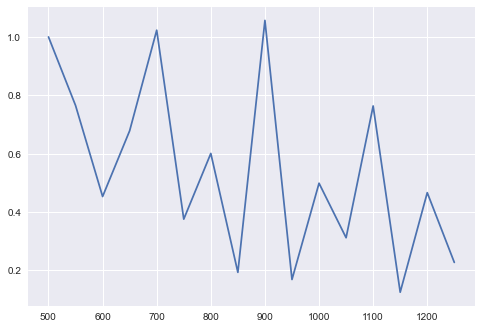

In [78]:
plt.plot(n_sizeRange,errorSample)
plt.show()

In [79]:
print(errorSample)

[1.0007904274822437, 0.7657824991257307, 0.4536229398616741, 0.6791040473976413, 1.02392141456823, 0.3760765272170407, 0.6013488559497275, 0.19361437981789634, 1.0574510063212679, 0.1690684193572454, 0.49922023049673137, 0.3122669076694536, 0.7640905773953056, 0.125500466880135, 0.4668058300112541, 0.2276837119802791]


In [76]:
print(threshold)

3162
